## House Prices: Advanced Regression Techniques

In [1]:
#import some necessary librairies


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "/Users/andoutakaaki/DIC_study/EDA4"]).decode("utf8")) #check the files available in the directory

House_Prices3.ipynb
Untitled.ipynb
all
sample_submission.csv
sample_submission2.csv
test.csv
train.csv



In [2]:
DIR='/Users/andoutakaaki/DIC_study/EDA4'
submission = pd.read_csv(DIR+"/sample_submission.csv")
test = pd.read_csv(DIR+"/test.csv")
train = pd.read_csv(DIR+"/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
submission.head()

,Id,SalePrice
0,1461,169277.052
1,1462,187758.394
2,1463,183583.684
3,1464,179317.478
4,1465,150730.080


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
submission.shape

(1459, 2)

In [9]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [11]:
type(train)

pandas.core.frame.DataFrame

In [12]:
type(test)

pandas.core.frame.DataFrame

In [13]:
train.size

118260

In [14]:
test.size

116720

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [17]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [18]:
train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [19]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
777,778,20,RL,100.000,13350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,142500
118,119,60,RL,90.000,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
205,206,20,RL,99.000,11851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,180500
957,958,20,RL,70.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,132000
1351,1352,60,RL,70.000,9247,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,171000


In [20]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


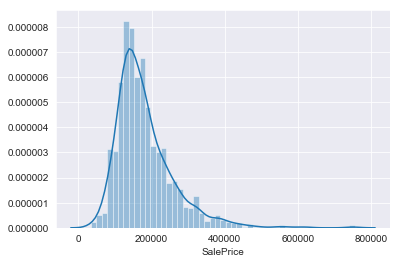

In [21]:
# teacher：教師ラベル
teacher = train['SalePrice']

import warnings
warnings.simplefilter('ignore', UserWarning)

import seaborn as sns
sns.distplot(teacher)

#print(y['SalePrice'].index,y)
#plt.show()

In [22]:
a = teacher.values.max()
print(a)

755000


In [23]:
b= np.log(a)

In [24]:
print(b)

13.534473028231162


In [25]:
c = np.exp(b)
print(c)

754999.9999999999


In [26]:
d = np.expm1(b)
print(d)

754998.9999999999


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


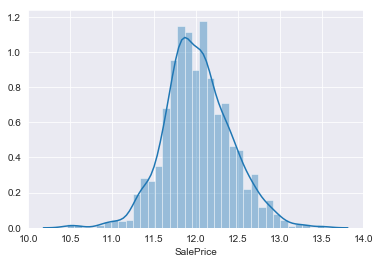

In [27]:
# 正規分布にするために、対数をとる　
normal_distribution = np.log(teacher)

import warnings
warnings.simplefilter('ignore', UserWarning)

import seaborn as sns
sns.distplot(normal_distribution)

In [28]:
# サンプルと機能の数を確認する
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

# 「ID」列を保存する
train_ID = train['Id']
test_ID = test['Id']

# 予測プロセスには不要なので、 'Id'列を削除してください。
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# 'Id'変数を削除した後で再度データサイズを確認してください
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [29]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [30]:
## indexを指定した理由は、カラム名だけを抽出したため。数字は一旦除く
null_col = train.isnull().sum()[train.isnull().sum()>0].index 

In [31]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [32]:
train.isnull().sum()[train.isnull().sum()>0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [33]:
null_col

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

## カラムの最大・最小を見てみる

In [34]:
train[null_col].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000,1452.000,1379.000
mean,70.050,103.685,1978.506
std,24.285,181.066,24.690
min,21.000,0.000,1900.000
25%,59.000,0.000,1961.000
50%,69.000,0.000,1980.000
75%,80.000,166.000,2002.000
max,313.000,1600.000,2010.000


In [35]:
train["LotFrontage"] = train["LotFrontage"].fillna(0)
test["LotFrontage"] = test["LotFrontage"].fillna(0)

In [36]:
train.MasVnrArea = train.MasVnrArea.fillna(0)
test.MasVnrArea = test.MasVnrArea.fillna(0)

In [37]:
train.GarageYrBlt = train.GarageYrBlt.fillna(0)
test.GarageYrBlt = test.GarageYrBlt.fillna(0)

In [38]:
train_and_test = pd.concat([train,test],sort=False)

In [39]:
train_and_test.LotFrontage = train_and_test.LotFrontage.fillna(0)
train_and_test.MasVnrArea = train_and_test.MasVnrArea.fillna(0)
train_and_test.GarageYrBlt = train_and_test.GarageYrBlt.fillna(0)

In [40]:
train_and_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [41]:
object_columns = train.select_dtypes(include=object).columns
print(object_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [42]:
object_columns.shape

(43,)

In [43]:
type(object_columns)

pandas.core.indexes.base.Index

In [44]:
for column in object_columns:
    a,b = pd.factorize(train[column])
    train[column] = a

In [45]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.000,8450,0,-1,0,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500
1,20,0,80.000,9600,0,-1,0,0,0,1,...,0,-1,-1,-1,0,5,2007,0,0,181500
2,60,0,68.000,11250,0,-1,1,0,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500
3,70,0,60.000,9550,0,-1,1,0,0,2,...,0,-1,-1,-1,0,2,2006,0,1,140000
4,60,0,84.000,14260,0,-1,1,0,0,1,...,0,-1,-1,-1,0,12,2008,0,0,250000


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
Mas

In [47]:
train[(train.GarageYrBlt.isnull())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### sklearn
linerRegresion
RtihGBM
randomForest

### 相関関係のあるトップ１０をグラフで表示

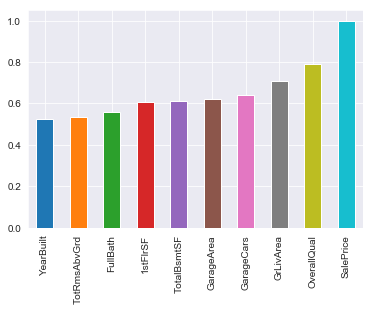

In [48]:
train.corr().SalePrice.abs().sort_values()[-10:].plot.bar()

### 相関を表示

In [49]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.000,8450,0,-1,0,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500
1,20,0,80.000,9600,0,-1,0,0,0,1,...,0,-1,-1,-1,0,5,2007,0,0,181500
2,60,0,68.000,11250,0,-1,1,0,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500
3,70,0,60.000,9550,0,-1,1,0,0,2,...,0,-1,-1,-1,0,2,2006,0,1,140000
4,60,0,84.000,14260,0,-1,1,0,0,1,...,0,-1,-1,-1,0,12,2008,0,0,250000


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
Mas

In [51]:
train.shape

(1460, 80)

In [52]:
train = train.drop("SalePrice" ,axis = 1)

In [53]:
# train_x:トレーニング用の特徴行列
# test_x:テスト用の特徴行列
# train_y:トレーニング用の目的変数
# test_y:テスト用の目的変数
train_x, test_x, train_y, test_y = train_test_split(train, normal_distribution,test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
from sklearn import metrics

In [55]:
print(np.sqrt(metrics.mean_squared_error(test_y, model.predict(test_x))))

0.18536880715715554


In [56]:
print("偏回帰変数：",model.coef_)  #回帰変数の表示
print('-'*100)
print("回帰直線の切片：",model.intercept_)  #回帰直線の切片
print('-'*100)
print("パラメータの取得：",model.get_params())  #パラメータの取得
print('-'*100)
print("予測値の表示：",model.predict(test_x))  #予測値の表示
print('-'*100)
print("決定係数の表示：",model.score(test_x,test_y))  #決定係数の表示

偏回帰変数： [-4.20369694e-05 -9.88820261e-03  1.37928248e-04  1.87834428e-06
 -2.06424690e-01  1.94841391e-02  1.39541854e-02  1.25332404e-02
 -1.86728150e-01  8.18061996e-03  6.54072786e-03 -1.88938239e-03
 -1.24754193e-02 -8.17592841e-02 -1.50101901e-02  2.59745829e-03
  6.85828812e-02  4.23127032e-02  2.11076242e-03  7.68175462e-04
  1.75711006e-02 -1.13384056e-02 -2.20145721e-03  1.14116799e-03
  5.64538838e-03 -1.11537528e-06 -1.38026066e-02 -1.69255515e-02
 -6.01113461e-03  1.25319918e-02 -9.33542767e-03 -1.31238266e-03
 -4.68823257e-03  4.66865786e-05 -2.95131521e-03  4.19119668e-05
 -1.17572593e-05  7.68412861e-05  1.75150662e-03 -2.25314937e-02
 -6.48553424e-02  2.75578331e-03  8.71123874e-05  2.40650185e-05
  5.41128713e-05  1.65290277e-04  3.18334121e-02  1.65657774e-02
  4.97334566e-02  3.74176824e-02 -4.35807628e-03 -5.08962660e-02
  2.23416582e-02  1.18056980e-02 -2.87863311e-02  3.61598679e-02
  8.52259584e-04 -4.46980565e-03  2.28169974e-05  3.67261580e-04
  2.88653726e-02  

In [57]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
